## 6.4 Численное решение задачи Коши
Написать программу для решения задачи Коши для произвольной системы ОДУ

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def runge_kutta_solve(T, u0, f, jac, N, eps):
    h = T / N
    t = 0
    u = [u0]
    
    def newton_roots(t_n, u_n):
        k1 = np.zeros(u0.shape[0])
        k2 = np.zeros(u0.shape[0])
        step = np.linalg.inv(jac(t_n + h / 4, u_n + h * k1 / 4) 
                             @ (h / 4 * np.eye(u0.shape[0]))
                             - np.eye(u0.shape[0])) \
               @ (f(t_n + h / 4, u_n + h * k1 / 4) - k1) 
        while np.max(np.abs(step)) > eps:
            k1 = k1 - step
            step = np.linalg.inv(jac(t_n + h / 4, u_n + h * k1 / 4) 
                             @ (h / 4 * np.eye(u0.shape[0]))
                             - np.eye(u0.shape[0])) \
               @ (f(t_n + h / 4, u_n + h * k1 / 4) - k1) 
        step = np.linalg.inv(jac(t_n + 3 * h / 4, u_n + h * (k1 / 2 + k2 / 4)) 
                             @ (h / 4 * np.eye(u0.shape[0])) 
                             - np.eye(u0.shape[0])) \
                @ (f(t_n + 3 * h / 4, u_n + h * (k1 / 2 + k2 / 4)) - k2)
        
        while np.max(np.abs(step)) > eps:
            k2 = k2 - step
            step = np.linalg.inv(jac(t_n + 3 * h / 4, u_n + h * (k1 / 2 + k2 / 4)) 
                             @ (h / 4 * np.eye(u0.shape[0])) 
                             - np.eye(u0.shape[0])) \
                @ (f(t_n + 3 * h / 4, u_n + h * (k1 / 2 + k2 / 4)) - k2)
        return k1, k2

    for i in range(1, N + 1):
        k_1, k_2 = newton_roots(t, u[i - 1])
        u_i = u[i - 1] + h * (k_1 + k_2) / 2
        u.append(u_i)
        t += h
        
    return np.array(u)
                             

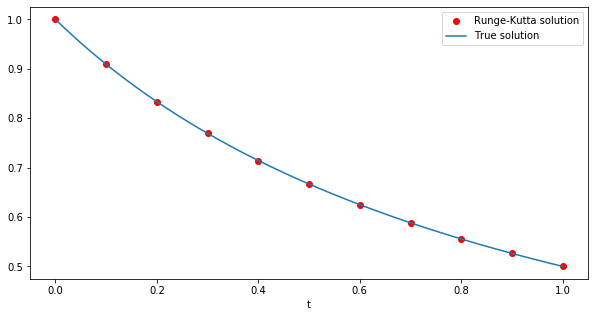

In [4]:
f = lambda t, x : np.array([-x**3 * (1 + t)])
u0 = np.array([1])
jac = lambda t, x : np.array([-3*x[0]**2 * (1 + t)])
x_sol = lambda t : 1 / (1 + t)
steps = 10

T = 1
u = runge_kutta_solve(T, u0, f, jac, steps, 1e-6)
h = np.linspace(0, T, steps + 1)

plt.figure(figsize=(10,5))
plt.plot(h, u[:,0], 'ro', label="Runge-Kutta solution")
xx = np.linspace(0, T, 100)
plt.plot(xx, x_sol(xx), label="True solution")
plt.xlabel("t")
plt.legend()

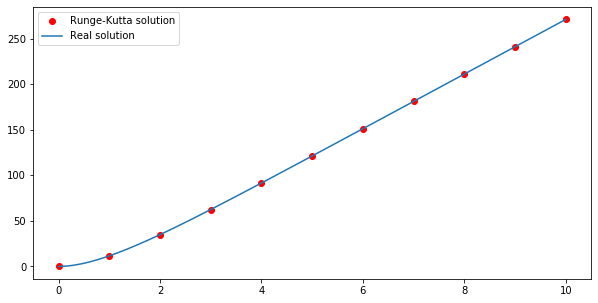

In [36]:
f = lambda t, x : np.array([-2*x[0] - x[1] + 36*t, -4*x[0] - 5*x[1]])
jac = lambda t, x : np.array([[-2, 1], [-4, -5]])
sol = lambda x : 28.8*np.exp(-x) + 0.2*np.exp(-6*x) + (30*x - 29)
u0 = np.array([0, 0])
T = 10
tol = 1e-7

steps = 10
u = runge_kutta_solve(T, u0, f, jac, steps, tol)
h = np.linspace(0, T, steps + 1)

plt.figure(figsize=(10,5))
plt.plot(h, u[:,0], 'ro', label="Runge-Kutta solution")
xx = np.linspace(0, T, 10000)
plt.plot(xx, sol(xx), label="Real solution")
plt.legend()

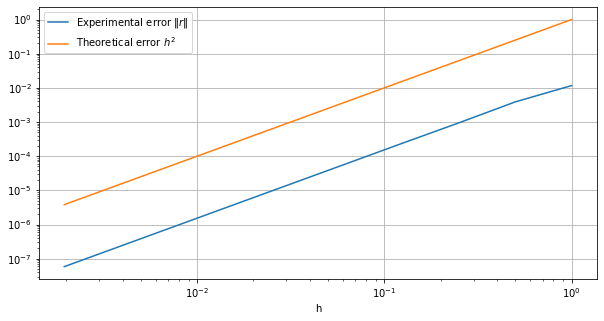

In [5]:
tol = 1e-7

f = lambda t, x : np.array([-x**3 * (1 + t)])
u0 = np.array([1])
jac = lambda t, x : np.array([-3*x[0]**2 * (1 + t)])
sol = lambda t : 1 / (1 + t)

N = 10
error = []
steps = []
for i in range(N):
    step = 2**i
    u = runge_kutta_solve(T, u0, f, jac, step, tol)
    error.append(np.linalg.norm(u[:,0] - sol(np.linspace(0, T, 2**i + 1)), np.inf))
    steps.append(T / 2**i)
error = np.array(error)
steps = np.array(steps)

plt.figure(figsize=(10, 5))
plt.loglog(steps, error, label="Experimental error $\Vert r \Vert$")
plt.loglog(steps, steps**2, label="Theoretical error $h^2$")
plt.grid()
plt.xlabel('h')
plt.legend()